# Analisis Proyecto Alfa

## Explicación Detallada

In [2]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
fileJuegoPath="./juego/"
fileJuegoPath="./registro/"
initial_clients = 50
final_clients = 500

In [7]:
#Get average for each client
for number_clients in range(initial_clients,final_clients+1,50):
    for current_iter in range(10):
        fileName=str(number_clients)+"_clientes_"+str(current_iter)+".csv"
        # Read the CSV file
        # print(fileName)
        try:
            with open(fileJuegoPath+fileName, 'r') as file:
                reader = csv.reader(file)
                data = list(reader)
            
            # Convert the data to a NumPy array
            data_array = np.array(data, dtype=float)


            # Calculate the average for each row
            averages = np.mean(data_array, axis=1)

            # Write the averages to a new CSV file in the output directory

            output_directory = 'Analysis/Juego'
            os.makedirs(output_directory, exist_ok=True)

            output_path = os.path.join(output_directory, fileName)
            with open(output_path, 'w', newline='') as file:
                writer = csv.writer(file)
                # writer.writerow(['Average'])  # Write header
                for average in averages:
                    writer.writerow([average])


        except:
            pass

       
    

In [8]:
#Sacar la std the ambos csv
filepath="./Analysis/Juego/"
# Create a DataFrame to store results
result_df = pd.DataFrame(columns=['Number of Clients', 'Average Standard Deviation'])


for number_clients in range(initial_clients,final_clients+1,50):
    std_values = []
    for current_iter in range(10):
        fileName=str(number_clients)+"_clientes_"+str(current_iter)+".csv"
        try:
            with open(filepath+fileName, 'r') as file:
                    reader = csv.reader(file)
                    for row in reader:
                        std_values.append(float(row[0]))
        except:
             pass

         # Calculate average of standard deviation values
    average_std = np.mean(std_values)
    # Append to DataFrame
    new_row_df = pd.DataFrame({'Number of Clients': [number_clients], 'Average Standard Deviation': [average_std]})
    # Concatenate DataFrames
    result_df = pd.concat([result_df, new_row_df], ignore_index=True)
    
    

print(result_df)

  Number of Clients  Average Standard Deviation
0                50                    0.000827
1               100                         NaN
2               150                         NaN
3               200                         NaN
4               250                         NaN
5               300                         NaN
6               350                         NaN
7               400                         NaN
8               450                         NaN
9               500                         NaN


C:\Users\intercambio\AppData\Local\Temp\ipykernel_7488\3191474503.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row_df], ignore_index=True)
c:\Users\intercambio\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\intercambio\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


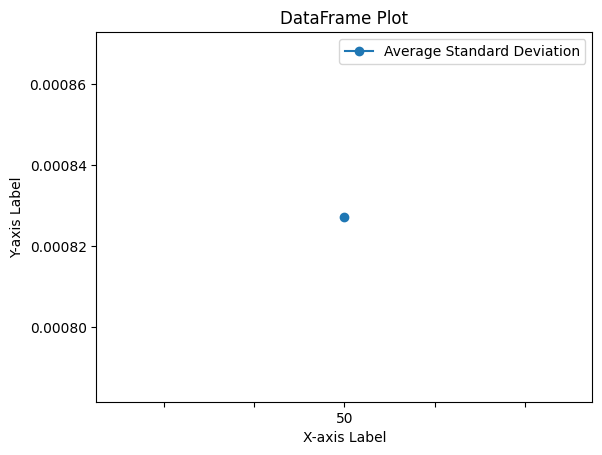

In [9]:
# Plot the DataFrame
result_df.plot(x='Number of Clients', y='Average Standard Deviation', kind='line', marker='o')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('DataFrame Plot')

# Show the plot
plt.show()